In [2]:
cd /scratch/ssd001/home/ama/workspace/ama-at-vector/freq-robust

/scratch/ssd001/home/ama/workspace/ama-at-vector/freq-robust


In [4]:
import torch
import ipdb
import numpy as np
import cv2
import matplotlib.pyplot as plt
from src.utils_dataset import load_dataset
from src.utils_general import seed_everything
from src.utils_freq import rgb2gray, dct


In [5]:
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed = 12
seed_everything(seed)
print(_device)

cuda:0


In [14]:
_batch_size = 1
train_loader, test_loader = load_dataset("cifar10", _batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
temp = torch.zeros([1,32,32],device = _device)

for X, y in test_loader:
    X, y = X.to(_device), y.to(_device)
    
    for i in range(0,1):
        X_gray = rgb2gray(X[i,:,:])
        a = torch.tensor(cv2.dct(X_gray.cpu().detach().numpy()), device = _device)
        temp[i,:,:] = a
    break

In [16]:
# temp_v2 = torch.zeros([128,32,32],device = _device)

for X, y in test_loader:
    X, y = X.to(_device), y.to(_device)
    
    temp_v2 = dct(rgb2gray(X), _device)
#     for i in range(0,128):
#         a = torch.tensor(cv2.dct(rgb2gray(X[i,:,:]).cpu().detach().numpy()), device = _device)
#         print()
#         temp[i,:,:] = a
#     print(a.shape)
#     print(temp[i,:,:].shape)
    break

In [17]:
(temp-temp_v2).abs().max()

tensor(1.1278e-06, device='cuda:0')

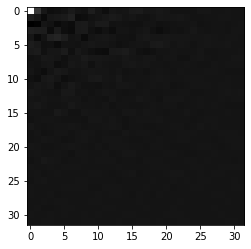

In [28]:
tbox = cv2.dct(temp[0,:,:].cpu().detach().numpy())

plt.imshow(tbox, cmap = "gray")

In [30]:
custom = dct_batch(xx)
print(custom.shape)

torch.Size([128, 32, 32])


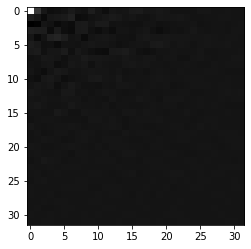

In [31]:
plt.imshow(custom[0,:,:].squeeze().cpu().detach().numpy(), cmap = "gray")

In [32]:
tbox = torch.tensor(tbox, device = _device)
abs(tbox-custom[0,:,:]).max()

tensor(1.1260e-06, device='cuda:0')

tensor(9.5367e-07, device='cuda:0')